In [1]:
import pandas as pd

data = pd.read_csv('../data/registrations.csv')

In [2]:
def grade(gr):
    if gr == 'FR':
        return 1
    elif gr == 'SO':
        return 2
    elif gr == 'SP':
        return 2
    elif gr == 'JR':
        return 3
    elif gr == 'SR':
        return 4
    else:
        print gr
        print 'grade error ???'
        
data['numgrade'] = data['grade'].apply(grade)

GR
grade error ???
XR
grade error ???
GR
grade error ???


In [3]:
data.head()

,studentid,semester,grade,major,concentration,code,section,coursetitle,sectiontitle,professor,course-sectiontitle,code-semester,Unnamed: 0,coursetype,numgrade
0,30876146,0708FA,SR,Engineering,Computing,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Lynch, Caitrin",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0708FA,247,NaN,4
1,23925034,0607FA,SR,Engineering,Bioengineering,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN,4
2,99052948,0607FA,SR,Electr'l & Computer Engr,NaN,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN,4
3,29826367,0607FA,SR,Mechanical Engineering,NaN,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN,4
4,91614816,0607FA,SR,Mechanical Engineering,NaN,AHS CAP SPR,1,AHS CapstoneSpring Pre-registration,NaN,"Martello, Robert",AHS CapstoneSpring Pre-registration,AHS CAP SPR 0607FA,247,NaN,4


In [4]:
courses = data.groupby('code')
print courses

In [5]:
coursed = {}
for course in courses:
    coursed[course[0]] = course[1].numgrade.value_counts()

coursedf = pd.DataFrame(coursed)
coursedf = coursedf.transpose()
coursedf.head()

,1.0,2.0,3.0,4.0
AHS CAP SPR,NaN,NaN,NaN,30
AHS1101,46,NaN,NaN,NaN
AHS1102,50,NaN,NaN,NaN
AHS1105,10,6,NaN,NaN
AHS1110,28,4,NaN,NaN


In [6]:
import math
def nan(value):
    if math.isnan(value):
        return 0
    else:
        return value

def nan_subtract(numgradeval, meanval):
    if math.isnan(numgradeval):
        return 0
    else:
        return numbradeval - meanval
    
coursedf['total_students'] = (coursedf[1.0].apply(nan) + coursedf[2.0].apply(nan) 
                              + coursedf[3.0].apply(nan) + coursedf[4.0].apply(nan))
coursedf['mean_grade'] = (coursedf[1.0].apply(nan) + 2*coursedf[2.0].apply(nan) 
                          + 3*coursedf[3.0].apply(nan) + 4*coursedf[4.0].apply(nan))/coursedf['total_students']

coursedf['dev1.0'] = (1.0-coursedf['mean_grade'])**2 * coursedf[1.0]
coursedf['dev2.0'] = (2.0-coursedf['mean_grade'])**2 * coursedf[2.0]
coursedf['dev3.0'] = (3.0-coursedf['mean_grade'])**2 * coursedf[3.0]
coursedf['dev4.0'] = (4.0-coursedf['mean_grade'])**2 * coursedf[4.0]


coursedf['standard_dev'] = (coursedf['dev1.0'].apply(nan) 
                            + coursedf['dev2.0'].apply(nan) 
                            + coursedf['dev3.0'].apply(nan) + 
                            coursedf['dev4.0'].apply(nan))/(coursedf['total_students'])

coursedf.head(100) 

,1.0,2.0,3.0,4.0,total_students,mean_grade,dev1.0,dev2.0,dev3.0,dev4.0,standard_dev
AHS CAP SPR,NaN,NaN,NaN,30,30,4.000000,NaN,NaN,NaN,0.000000,0.000000
AHS1101,46,NaN,NaN,NaN,46,1.000000,0.000000,NaN,NaN,NaN,0.000000
AHS1102,50,NaN,NaN,NaN,50,1.000000,0.000000,NaN,NaN,NaN,0.000000
AHS1105,10,6,NaN,NaN,16,1.375000,1.406250,2.343750,NaN,NaN,0.234375
AHS1110,28,4,NaN,NaN,32,1.125000,0.437500,3.062500,NaN,NaN,0.109375
AHS1111,8,3,1,NaN,12,1.416667,1.388889,1.020833,2.506944,NaN,0.409722
AHS1120,18,4,NaN,NaN,22,1.181818,0.595041,2.677686,NaN,NaN,0.148760
AHS1122,9,6,NaN,NaN,15,1.400000,1.440000,2.160000,NaN,NaN,0.240000
AHS1130,18,2,NaN,NaN,20,1.100000,0.180000,1.620000,NaN,NaN,0.090000
AHS1140,7,NaN,NaN,NaN,7,1.000000,0.000000,NaN,NaN,NaN,0.000000


In [7]:
newcoursedf = pd.read_csv('../data/classyearmeansd.csv')

newcoursedf['course_name'] = 'ah'

data_i = -1

for i in range(len(newcoursedf['code'])):
    a = data[data['code'] == newcoursedf['code'][i]]
    data_i += len(a)
    newcoursedf['course_name'][i] = a['coursetitle'][data_i]
   

/home/tj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
newcoursedf.head()

,index,code,1,2,3,4,total_students,mean_grade,dev1.0,dev2.0,dev3.0,dev4.0,standard_dev,course_name
0,0,AHS CAP SPR,NaN,NaN,NaN,30,30,4.000,NaN,NaN,NaN,0,0.000000,AHS CapstoneSpring Pre-registration
1,1,AHS1101,46,NaN,NaN,NaN,46,1.000,0.00000,NaN,NaN,NaN,0.000000,History and Society
2,2,AHS1102,50,NaN,NaN,NaN,50,1.000,0.00000,NaN,NaN,NaN,0.000000,Arts and Humanities
3,3,AHS1105,10,6,NaN,NaN,16,1.375,1.40625,2.34375,NaN,NaN,0.234375,"Arts, Humanities, Social ScienceFoundation wit..."
4,4,AHS1110,28,4,NaN,NaN,32,1.125,0.43750,3.06250,NaN,NaN,0.109375,"History of TechnologyFoundation: Technology, S..."


In [9]:
meandict = {}
sddict = {}

for i in range(len(newcoursedf)):
    meandict[newcoursedf['code'][i]] = newcoursedf['mean_grade'][i]
    sddict[newcoursedf['code'][i]] = newcoursedf['standard_dev'][i]

/home/tj/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


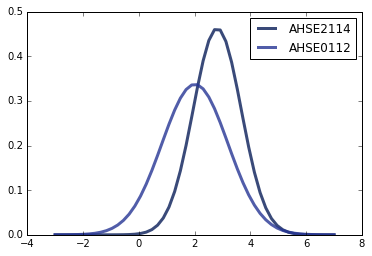

In [10]:
import numpy as np
import matplotlib.mlab as mlab
import math
import thinkplot as tplt
import matplotlib.pyplot as plt
%matplotlib inline

code_mean = meandict
code_sd = sddict

i = 30
i2 =12
key = newcoursedf['code'][i]
key2 = newcoursedf['code'][i2]

mean = code_mean[key]
sigma = code_sd[key]
mean2 = code_mean[key2]
sigma2 = code_sd[key2]

labels = [code_sd[key],code_sd[key2]]

x = np.linspace(-3,7,50)
tplt.plot(x,mlab.normpdf(x,mean,sigma),label = key)
tplt.plot(x,mlab.normpdf(x,mean2,sigma2),label = key2)
tplt.show()

In [11]:
for key in code_sd:
    if code_sd[key] == 0.0:
        code_sd[key] = 0.001

In [12]:
import re
key_to_title = {}
for i in range(len(newcoursedf)):
    key_to_title[newcoursedf['code'][i]] = re.sub('[\W]+', '_', newcoursedf['course_name'][i])

In [13]:
for key in code_mean:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_title('Student vs Years: ' + key)
    ax.set_xlabel('Student Year')
    ax.set_ylabel('Proportion')
    #x = np.linspace(code_mean[key]-8*code_sd[key],code_mean[key]+8*code_sd[key],50)
    x = np.linspace(0.5,4.5,1000)
    ax.plot(x,mlab.normpdf(x,code_mean[key],code_sd[key]),label = key, linewidth=3.0)
    
    plt.savefig('../data/stuyear/stuyear_'+key)
    plt.clf()

/home/tj/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [14]:
#coursedf.to_csv('../data/classyearmeansd.csv', index = True)

In [15]:
#data = pd.read_csv('../data/classyearmeansd.csv')
#data.head()

In [16]:
#columns = ['code','1','2','3','4','total_students','mean_grade','standard_dev']
#data = data[columns]
#data.head()

In [17]:
#data = pd.read_csv('../data/classyearmeansd.csv')
#data.head()